In [1]:
import torch 
import matplotlib.pyplot as plt
import math
from data_gen import curve_color
from vis import *

In [ ]:
# display the volume, i.e. the mapping of (x, y, theta) -> color 

In [9]:
theta = torch.linspace(0, 2 * math.pi, 360)
x = torch.cos(theta)
y = torch.sin(theta)
color = curve_color(x, y)

(-1.099959820508957,
 1.0999980866909027,
 -1.0999894440174103,
 1.0999894440174103)

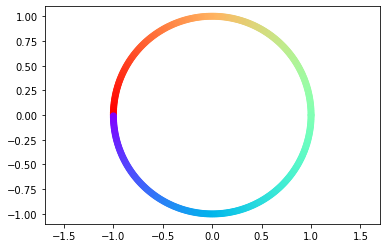

In [14]:
plt.scatter(x, y, c=color)
plt.axis('equal')

In [38]:
x_res = list(zip(theta, theta))
y_res = list(zip(theta - math.pi/2*3, theta - math.pi/2))

In [22]:
theta.shape

torch.Size([360])

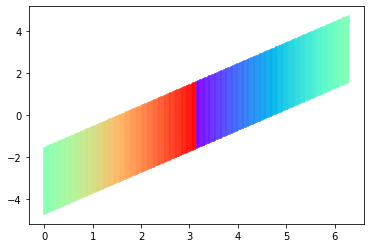

In [45]:
for i in range(len(theta)):
    plt.plot(x_res[i], y_res[i], c=color[i])

In [12]:
model = NeRF.load_from_checkpoint('lightning_logs/version_91/checkpoints/epoch=216-step=34068.ckpt')
model.eval()
model.cuda()

NeRF(
  (layer1): Linear(in_features=2, out_features=128, bias=True)
  (layer2): Linear(in_features=128, out_features=128, bias=True)
  (layer3_1): Linear(in_features=128, out_features=1, bias=True)
  (layer3_2): Linear(in_features=128, out_features=128, bias=True)
  (layer4): Linear(in_features=129, out_features=128, bias=True)
  (layer5): Linear(in_features=128, out_features=128, bias=True)
  (layer6): Linear(in_features=128, out_features=3, bias=True)
)

In [13]:
thetas = torch.linspace(-math.pi, math.pi, 360)
colors = []
for theta in thetas:
    theta = theta[None, ...]
    x = torch.cos(theta)
    y = torch.sin(theta)
    view = torch.linspace(theta[0] + math.pi/2, theta[0]+ math.pi/2*3, 180)
    color = curve_color(x, y)
    data = torch.stack([x.expand(view.shape[0]), y.expand(view.shape[0]), view]).t()
    res = torch.sigmoid(model.forward(data.cuda())[:, :3])
    colors.append(res)

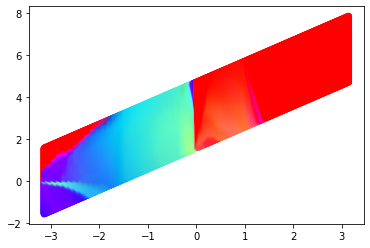

In [14]:
thetas = torch.linspace(-math.pi, math.pi, 360)
for i, theta in enumerate(thetas):
    theta = theta[None, ...]
    view = torch.linspace(theta[0] + math.pi/2, theta[0]+ math.pi/2*3, 180)
    theta = theta.expand(view.shape[0])
    plt.scatter(theta, view, c=colors[i].cpu().detach())

In [1]:
dataset = torch.load('dataset.pth', map_location='cpu')
plt.scatter(dataset.x, dataset.y, c=dataset.color)


NameError: name 'torch' is not defined

ValueError: tensor([[0.0021, 0.7802, 0.7863],
        [0.0021, 0.7789, 0.7850],
        [0.0021, 0.7775, 0.7836],
        [0.0021, 0.7762, 0.7823],
        [0.0020, 0.7747, 0.7814],
        [0.0020, 0.7711, 0.7866],
        [0.0019, 0.7673, 0.7918],
        [0.0018, 0.7636, 0.7968],
        [0.0018, 0.7598, 0.8018],
        [0.0017, 0.7560, 0.8069],
        [0.0017, 0.7524, 0.8123],
        [0.0017, 0.7489, 0.8182],
        [0.0017, 0.7454, 0.8244],
        [0.0017, 0.7419, 0.8304],
        [0.0017, 0.7387, 0.8365],
        [0.0017, 0.7357, 0.8427],
        [0.0018, 0.7327, 0.8488],
        [0.0018, 0.7297, 0.8546],
        [0.0018, 0.7281, 0.8585],
        [0.0018, 0.7290, 0.8597],
        [0.0019, 0.7299, 0.8607],
        [0.0019, 0.7307, 0.8640],
        [0.0020, 0.7314, 0.8678],
        [0.0020, 0.7322, 0.8714],
        [0.0021, 0.7330, 0.8750],
        [0.0022, 0.7336, 0.8783],
        [0.0023, 0.7341, 0.8815],
        [0.0024, 0.7346, 0.8846],
        [0.0025, 0.7352, 0.8876],
        [0.0027, 0.7357, 0.8906],
        [0.0028, 0.7362, 0.8935],
        [0.0030, 0.7367, 0.8963],
        [0.0031, 0.7372, 0.8991],
        [0.0033, 0.7378, 0.9018],
        [0.0035, 0.7383, 0.9044],
        [0.0036, 0.7388, 0.9070],
        [0.0038, 0.7393, 0.9094],
        [0.0039, 0.7375, 0.9109],
        [0.0039, 0.7344, 0.9119],
        [0.0039, 0.7308, 0.9130],
        [0.0040, 0.7271, 0.9141],
        [0.0040, 0.7237, 0.9151],
        [0.0040, 0.7203, 0.9161],
        [0.0040, 0.7170, 0.9171],
        [0.0040, 0.7146, 0.9181],
        [0.0041, 0.7122, 0.9190],
        [0.0040, 0.7099, 0.9196],
        [0.0040, 0.7077, 0.9201],
        [0.0040, 0.7060, 0.9205],
        [0.0039, 0.7060, 0.9209],
        [0.0038, 0.7060, 0.9213],
        [0.0038, 0.7060, 0.9217],
        [0.0037, 0.7060, 0.9221],
        [0.0036, 0.7059, 0.9225],
        [0.0035, 0.7059, 0.9229],
        [0.0034, 0.7059, 0.9233],
        [0.0034, 0.7059, 0.9236],
        [0.0033, 0.7059, 0.9240],
        [0.0034, 0.7060, 0.9245],
        [0.0034, 0.7060, 0.9250],
        [0.0035, 0.7061, 0.9255],
        [0.0035, 0.7062, 0.9260],
        [0.0036, 0.7062, 0.9264],
        [0.0036, 0.7063, 0.9269],
        [0.0037, 0.7063, 0.9274],
        [0.0037, 0.7064, 0.9278],
        [0.0038, 0.7065, 0.9281],
        [0.0038, 0.7066, 0.9279],
        [0.0039, 0.7067, 0.9277],
        [0.0040, 0.7068, 0.9275],
        [0.0040, 0.7068, 0.9271],
        [0.0040, 0.7069, 0.9267],
        [0.0040, 0.7068, 0.9263],
        [0.0040, 0.7067, 0.9259],
        [0.0040, 0.7067, 0.9255],
        [0.0040, 0.7066, 0.9251],
        [0.0040, 0.7064, 0.9247],
        [0.0040, 0.7062, 0.9243],
        [0.0041, 0.7060, 0.9239],
        [0.0041, 0.7058, 0.9235],
        [0.0041, 0.7056, 0.9230],
        [0.0041, 0.7054, 0.9226],
        [0.0041, 0.7052, 0.9222],
        [0.0041, 0.7050, 0.9218],
        [0.0042, 0.7048, 0.9214],
        [0.0042, 0.7046, 0.9210],
        [0.0042, 0.7044, 0.9206],
        [0.0042, 0.7042, 0.9202],
        [0.0042, 0.7040, 0.9197],
        [0.0042, 0.7038, 0.9193],
        [0.0043, 0.7036, 0.9189],
        [0.0043, 0.7034, 0.9185],
        [0.0043, 0.7032, 0.9180],
        [0.0043, 0.7030, 0.9176],
        [0.0043, 0.7028, 0.9172],
        [0.0044, 0.7026, 0.9167],
        [0.0044, 0.7024, 0.9163],
        [0.0044, 0.7022, 0.9159],
        [0.0044, 0.7020, 0.9154],
        [0.0044, 0.7018, 0.9150],
        [0.0044, 0.7016, 0.9145],
        [0.0045, 0.7015, 0.9141],
        [0.0045, 0.7013, 0.9137],
        [0.0045, 0.7012, 0.9133],
        [0.0045, 0.7010, 0.9128],
        [0.0045, 0.7009, 0.9124],
        [0.0045, 0.7007, 0.9120],
        [0.0045, 0.7005, 0.9116],
        [0.0045, 0.7004, 0.9112],
        [0.0045, 0.7002, 0.9107],
        [0.0045, 0.7001, 0.9103],
        [0.0045, 0.6999, 0.9099],
        [0.0046, 0.6998, 0.9094],
        [0.0046, 0.6996, 0.9090],
        [0.0047, 0.6999, 0.9089],
        [0.0047, 0.7003, 0.9089],
        [0.0048, 0.7007, 0.9090],
        [0.0049, 0.7014, 0.9091],
        [0.0051, 0.7021, 0.9092],
        [0.0052, 0.7027, 0.9094],
        [0.0053, 0.7034, 0.9095],
        [0.0054, 0.7040, 0.9096],
        [0.0055, 0.7047, 0.9097],
        [0.0056, 0.7054, 0.9100],
        [0.0057, 0.7061, 0.9104],
        [0.0058, 0.7069, 0.9109],
        [0.0059, 0.7076, 0.9113],
        [0.0059, 0.7084, 0.9118],
        [0.0060, 0.7093, 0.9123],
        [0.0061, 0.7103, 0.9128],
        [0.0062, 0.7112, 0.9133],
        [0.0063, 0.7121, 0.9137],
        [0.0065, 0.7130, 0.9142],
        [0.0066, 0.7140, 0.9147],
        [0.0067, 0.7149, 0.9152],
        [0.0068, 0.7158, 0.9157],
        [0.0069, 0.7168, 0.9161],
        [0.0070, 0.7177, 0.9166],
        [0.0071, 0.7186, 0.9171],
        [0.0072, 0.7196, 0.9176],
        [0.0073, 0.7205, 0.9180],
        [0.0075, 0.7214, 0.9185],
        [0.0076, 0.7224, 0.9189],
        [0.0078, 0.7238, 0.9191],
        [0.0079, 0.7252, 0.9193],
        [0.0081, 0.7266, 0.9195],
        [0.0083, 0.7279, 0.9197],
        [0.0084, 0.7293, 0.9199],
        [0.0086, 0.7306, 0.9201],
        [0.0088, 0.7320, 0.9203],
        [0.0090, 0.7333, 0.9204],
        [0.0092, 0.7347, 0.9206],
        [0.0094, 0.7360, 0.9208],
        [0.0096, 0.7374, 0.9210],
        [0.0098, 0.7387, 0.9212],
        [0.0100, 0.7400, 0.9214],
        [0.0102, 0.7414, 0.9216],
        [0.0105, 0.7427, 0.9218],
        [0.0107, 0.7440, 0.9220],
        [0.0109, 0.7453, 0.9222],
        [0.0111, 0.7466, 0.9223],
        [0.0114, 0.7479, 0.9225],
        [0.0116, 0.7492, 0.9227],
        [0.0119, 0.7505, 0.9229],
        [0.0121, 0.7518, 0.9231],
        [0.0124, 0.7531, 0.9233],
        [0.0127, 0.7543, 0.9235],
        [0.0129, 0.7556, 0.9236],
        [0.0132, 0.7569, 0.9238],
        [0.0135, 0.7582, 0.9240],
        [0.0138, 0.7594, 0.9242],
        [0.0141, 0.7607, 0.9244],
        [0.0144, 0.7619, 0.9246],
        [0.0147, 0.7632, 0.9247],
        [0.0150, 0.7647, 0.9250],
        [0.0153, 0.7662, 0.9252],
        [0.0157, 0.7678, 0.9255],
        [0.0163, 0.7696, 0.9257],
        [0.0169, 0.7715, 0.9260],
        [0.0176, 0.7733, 0.9262]], device='cuda:0', grad_fn=<SigmoidBackward0>) is not a valid value for color

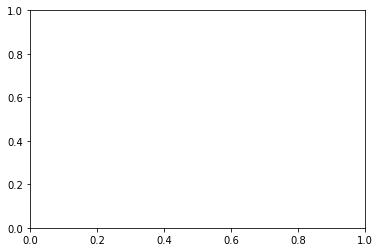

In [4]:
# x_res = list(zip(theta, theta))
# y_res = list(zip(theta + math.pi/2, theta + math.pi/2*3))
# for i in range(len(theta)):
#     plt.plot(x_res[i], y_res[i], c=colors[i])

In [91]:
res.shape

torch.Size([180, 4])

In [89]:
x.shape, view.shape

(torch.Size([1]), torch.Size([180]))

In [82]:
from matplotlib import cm
mapper = cm.ScalarMappable(cmap='rainbow')

In [85]:
mapper.to_rgba(val)[:3]

(0.5, 0.0, 1.0)

In [74]:
val

tensor(-1.5708)

In [62]:
res = torch.sigmoid(model.forward(data.cuda()))

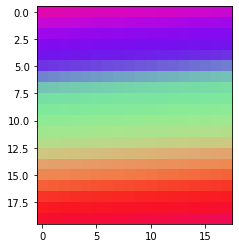

In [68]:
plt.imshow(res.cpu().detach().numpy()[:, :3].reshape(20, 18, 3))

In [65]:
res.shape

torch.Size([360, 4])